Name: Mariam Valladares

Labpartner(s): Sarah Brannum

In [1]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np

# Class 6.1

Today we will start with fiunction sharing and do more matplotlib.

# Warmups 6.1

**W.1** Write a function that loops through a list of numbers and checks if they are odd or even, then returns a new list of "odd" or "even" for each element in the input list. For example:

Given the list [3,8,7] the function would return
["odd", "even", "odd"]

In [18]:
def odd_even(list_file):
    """Function identifies if the element on a list are odd or even"""
    list1 = []
    for num in list_file:
        if (num % 2) == 0:
            list1.append('even')
        else:
            list1.append('odd')
    return list1
    
# apply function
list_file = [2,3,4]

odd_even(list_file)
            

['even', 'odd', 'even']

# Lecture 6.1

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - first 5 people today, the rest on Thursday

### Questions

### Loading and plotting netcdf files using xarray

Most modeling data output is in the form of netcdf files, as they can store more data (in binary) using less memory. Netcdf files are great because they tell you all about what is in the file (the variables and their units) with their metadata, which is kind of like the docstring we made for our function. There are a number of command line (unix-based) utilities for dealing with netcdf files, which I am not planning to cover in this course (though I use these all the time). Hit me up if you want some tutorials on this, or if enough of you are keen I will put some unix tutorials in the schedule.

Xarray is a python package that does analysis and basic plotting of netcdf files. This is actively being developed by folks like the pangeo consortium (https://pangeo.io), which is creating a number of python utilities for big data geoscience, like dealing with massive amounts of climate model output. There are other packages that can be used for parsing netcdf files, but they are cumbersome and clunky. Trust me, xarray is the best thing since sliced bread for big data geoscience. 

Let's grab some data and start playing with it. We are going to use the HYCOM Gulf of Mexico Analysis output, which is basically weather prediction for our local ocean made by the Navy, freely available. https://www.hycom.org.

In [2]:
import xarray as xr

# make sure you also have nectdf4 installed!

We want the HYCOM GoM reanalysis product: https://www.hycom.org/dataserver/gom/gom-reanalysis
And we are going to use the coarser resolution (1/25 degree) version for computational speed.

Which we can get using the opendap link (see http://xarray.pydata.org/en/stable/io.html)

In [3]:
# here I am going to grab the hindcast they made for Jan 1 2001. 
# Note I had to add the http: in front of the opendap link (see "open data here" button)

# download from the internet (use OPENDAT)
link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

# or download the file by clicking on the https server link and putting the correct path
file_path= "C:/Users/Mariam Valladares/Dropbox/PC/Desktop/Aplicaciones/LSU Courses/Fall 2024/OCS 4001.1/Labs/Lab 6.1/020_archv.2001_001_01_2d.nc"

In [6]:
hycom_data = xr.open_dataset(link, decode_times=False)

hycom_data2 = xr.open_dataset(file_path, decode_times=False)

# honestly I don't know why you need the decode_times bit with open_dataset
# I just know it doesn't work most of the time if you leave it out (bonus token for anyone who figures it out!)

The result is an xarray dataset, which is similar to the pandas dataframes you have been using. It has dimensions, coordinates and variables. The first thing to do when you get a dataset is to figure out what is in it and explore it a bit. 

In [7]:
hycom_data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM-TSIS
    institution:                     COAPS-FSU
    source:                          HYCOM archive file
    experiment:                      01.6
    comment:                         p-grid
    history:                         Fri Feb 11 20:08:27 2022: ncks -A -v wnd...
    history_of_appended_files:       Fri Feb 11 20:08:27 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

In [8]:
hycom_data2

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                CF-1.6
    title:                      HYCOM-TSIS
    institution:                COAPS-FSU
    source:                     HYCOM archive file
    experiment:                 01.6
    comment:                    p-grid
    history:                    Fri Feb 11 20:08:27 2022: ncks -A -v wnd_nwd,...
    history_of_appended_files:  Fri Feb 11 20:08:27 2022: Appended file wind....
    NCO:                        netCDF Operators version 4.9.8 (Homepage = ht...

This is the 2D surface variable file. I really want SST, so I think I'm going to need the 3D file

In [9]:
# get the 3D file and see what's in it

# download from the internet
link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_3z.nc"
hycom_data_3D = xr.open_dataset(link, decode_times=False)

In [10]:
hycom_data_3D

<xarray.Dataset>
Dimensions:     (Longitude: 525, Latitude: 385, Depth: 40, MT: 1)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude    (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Depth       (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * MT          (MT) float64 3.653e+04
    Date        (MT) float64 ...
Data variables:
    u           (MT, Depth, Latitude, Longitude) float32 ...
    v           (MT, Depth, Latitude, Longitude) float32 ...
    w_velocity  (MT, Depth, Latitude, Longitude) float32 ...
    water_temp  (MT, Depth, Latitude, Longitude) float32 ...
    salinity    (MT, Depth, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           HYCOM
    source:                          HYCOM archive
    experiment:                      02.0
    history:                         archv2ncdf3z
    DODS_EXTRA.Unlimited_Dimension:  MT

In [11]:
# what is the lat spacing and domain?

hycom_data.Latitude

# looks like it goes from 18.09 N to 31.96 N and the spacing is 0.04 degrees, i.e. 1/25, so that checks
# 1 degree is about 100 km, so thats 4 km model resolution

<xarray.DataArray 'Latitude' (Latitude: 385)>
array([18.091648, 18.129667, 18.167677, ..., 31.892748, 31.926704, 31.960648],
      dtype=float32)
Coordinates:
  * Latitude  (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
Attributes:
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [12]:
# what about lon?
hycom_data.Longitude

<xarray.DataArray 'Longitude' (Longitude: 525)>
array([-98.  , -97.96, -97.92, ..., -77.12, -77.08, -77.04], dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
Attributes:
    standard_name:  longitude
    units:          degrees_east
    point_spacing:  even
    axis:           X

### Basic plotting with xarray (not publication ready!)

In [13]:
hycom_data.ssh

<xarray.DataArray 'ssh' (MT: 1, Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
  * MT         (MT) float64 3.653e+04
    Date       (MT) float64 ...
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
Attributes:
    standard_name:  sea_surface_elevation
    valid_range:    [-1.7273812  1.5868927]
    long_name:       sea surf. height  [01.6H]
    units:          m
    _ChunkSizes:    [  1 385 525]

Note that one of the amazing things about xarray, is that it actually does not go and get the data until you call for it, so this will take a minute to upload.

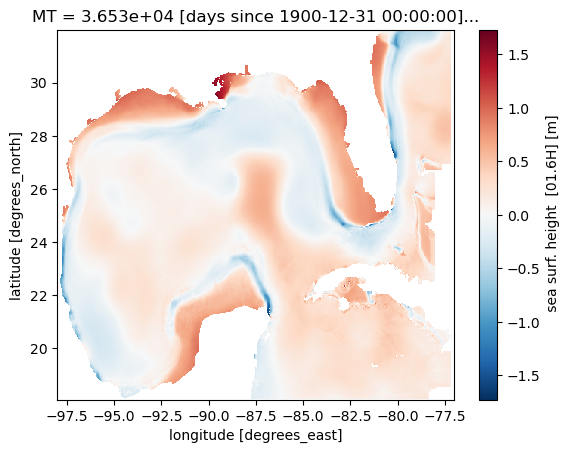

In [14]:
hycom_data.ssh.plot()

Note that xarray, like pandas, uses matplotlib for plotting, and that it figured out to use the blue to red colormap based on the type of data. Pretty cool. 

Let's plot some temperature data and see how it compares. Since temperature data is given for the whole depth, we have to select a level.

water_temp
(MT, Depth, Latitude, Longitude)

In [15]:
hycom_data_3D.water_temp[0,0,:,:]

<xarray.DataArray 'water_temp' (Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth      float32 0.0
    MT         float64 3.653e+04
    Date       float64 ...
Attributes:
    standard_name:  sea_water_temperature
    long_name:        temp [02.0H]
    units:          degC
    valid_range:    [ 3.3212209 27.482658 ]

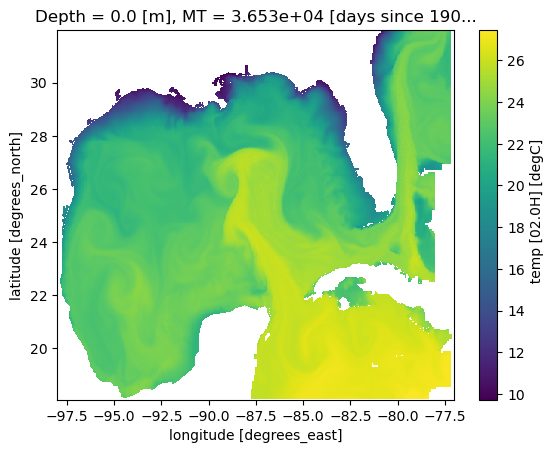

In [16]:
hycom_data_3D.water_temp[0,0,:,:].plot()  #first time, surface level, all lat and long

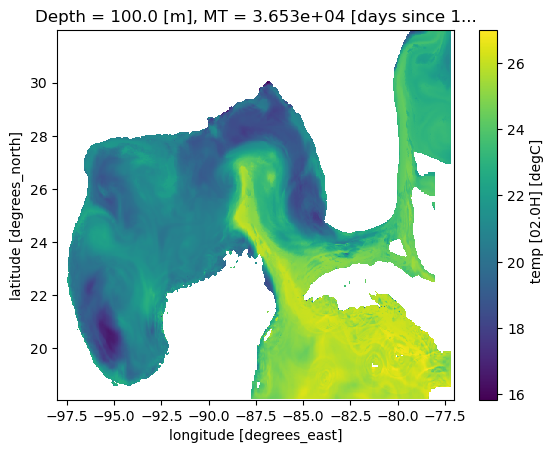

In [17]:
hycom_data_3D.water_temp[0,19,:,:].plot()  #time 1, deeper depth, all lat and long

Those plots are really small. I like to change the default matplotlib preferences to make my plots bigger.

In [18]:
# change all the defaults (usually I stick this up with the import statements)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 5.0]
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['savefig.dpi'] = 500

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

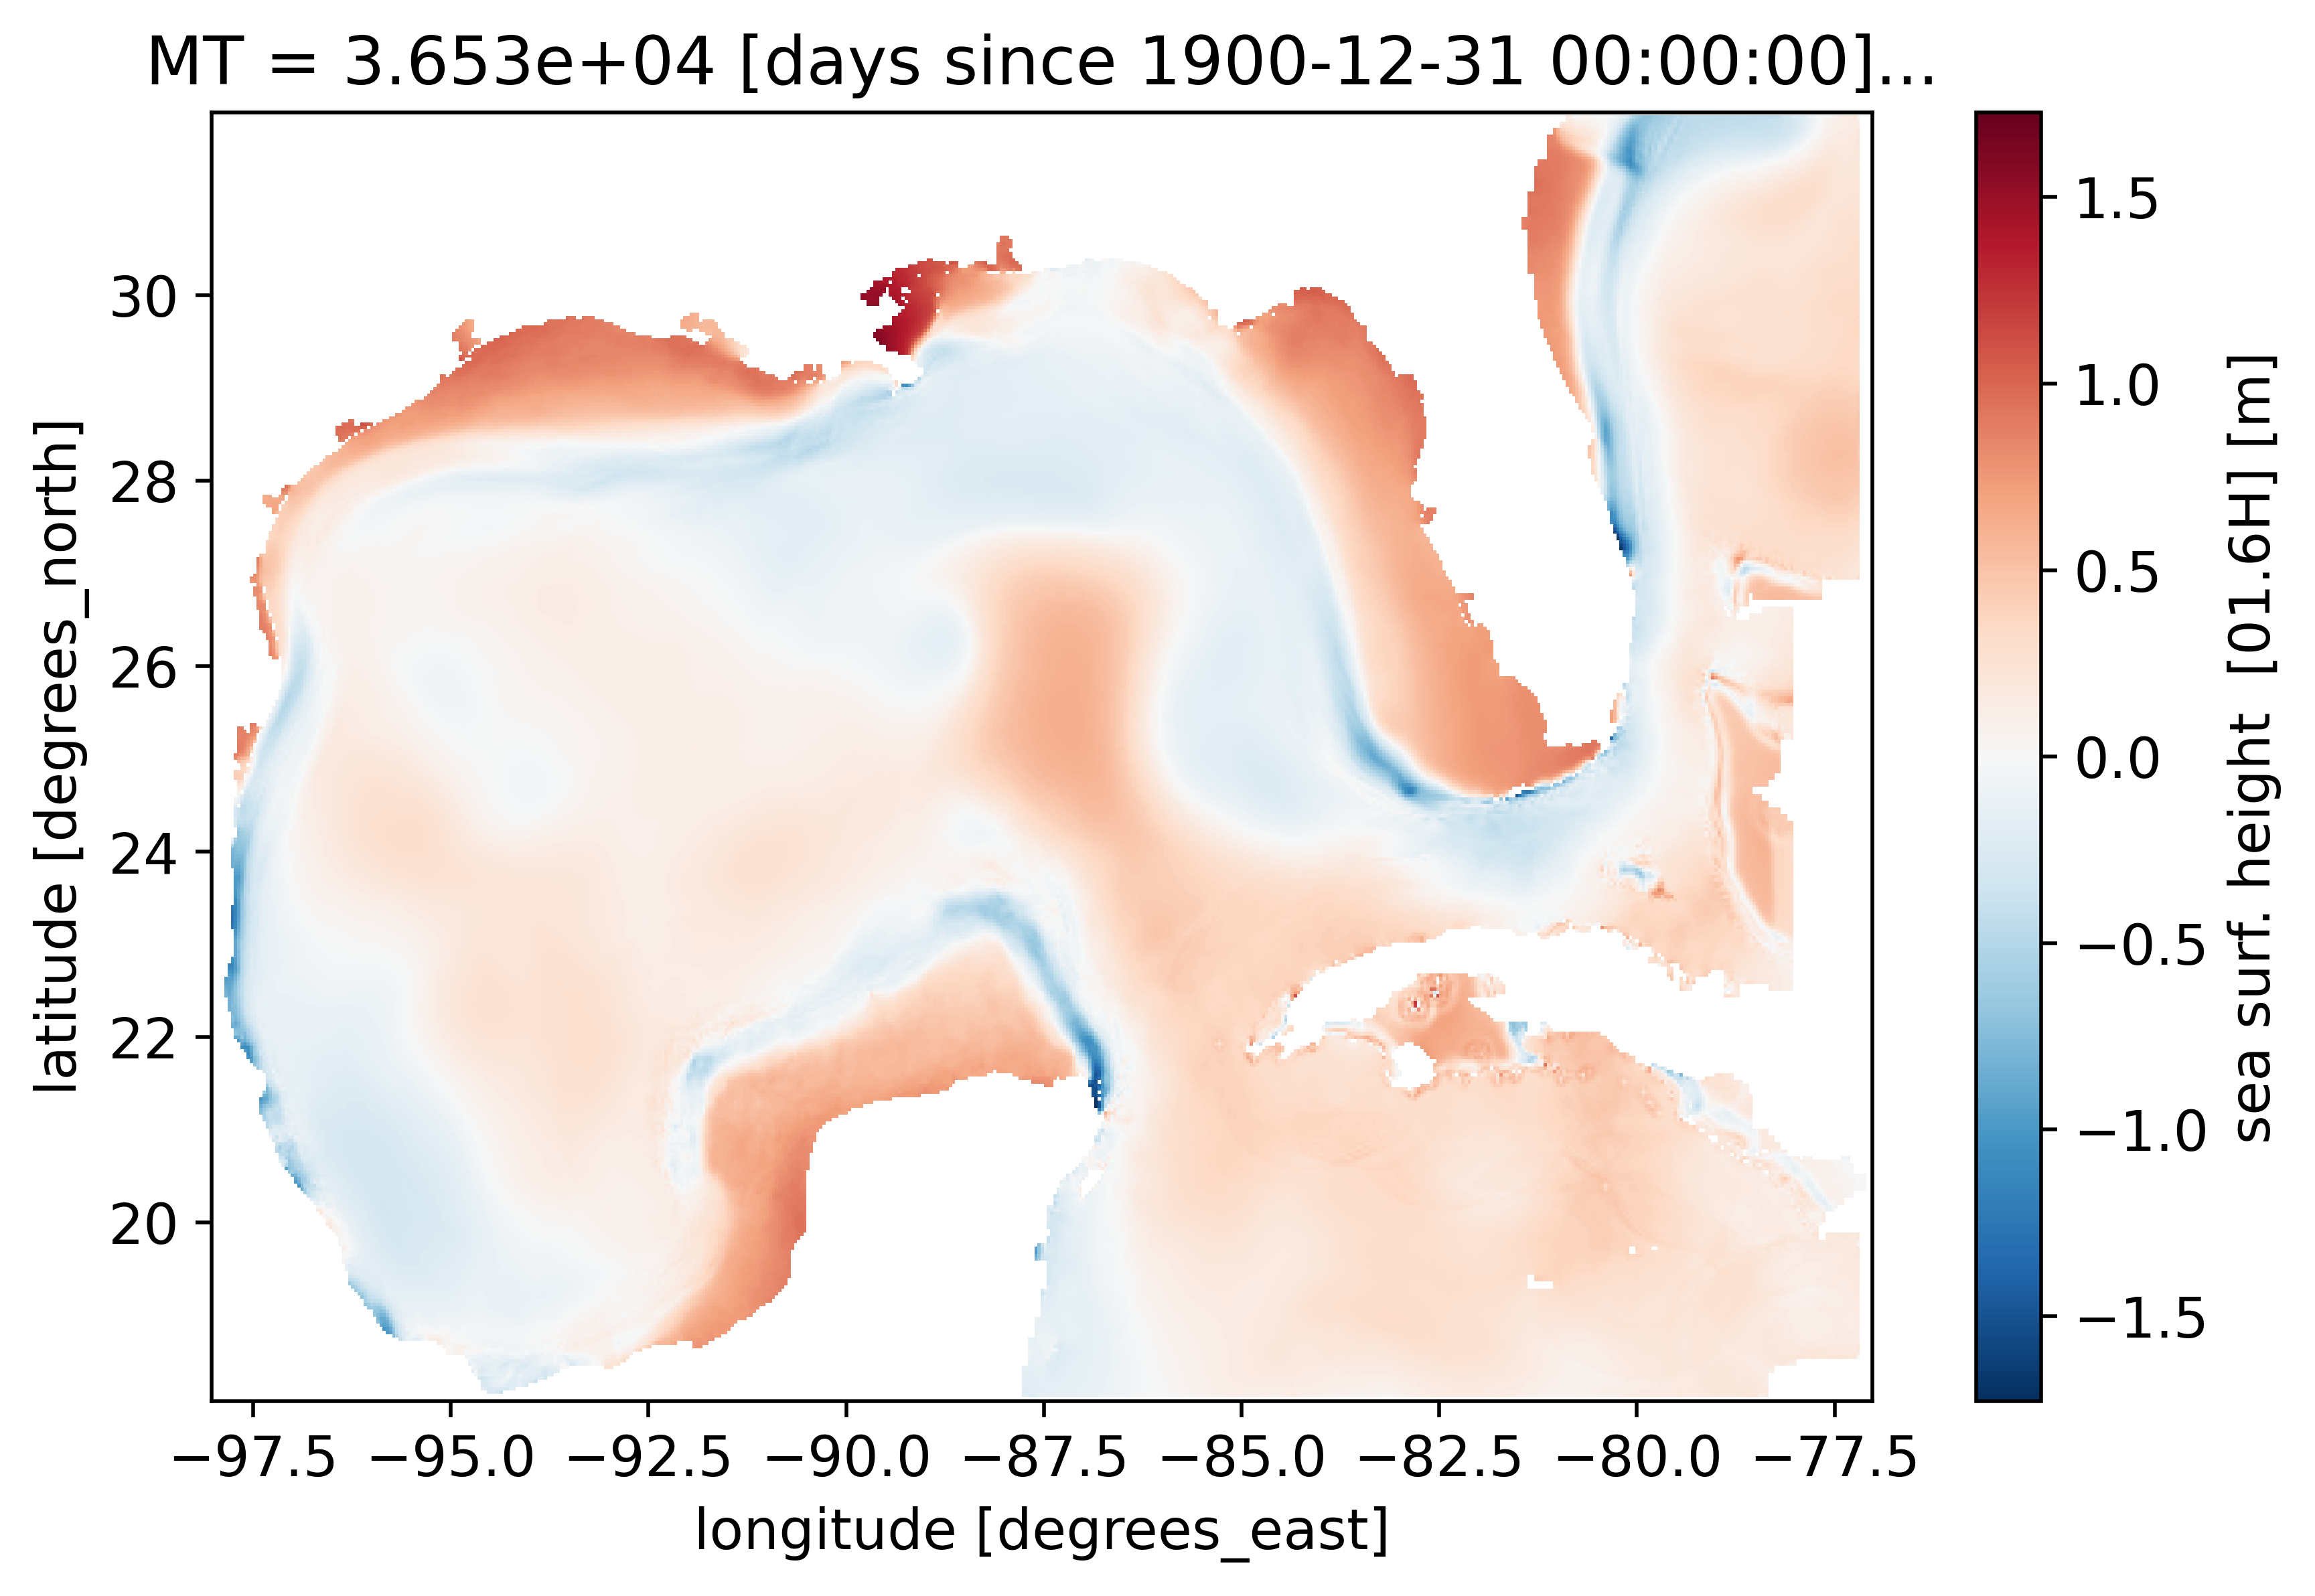

In [19]:
# now it's big and pretty.

hycom_data.ssh.plot()

Note if you know you are going to plot the same bit of data over and over again to fiddle with the plot, you can download the data you need and save it in an array to make the proccess faster.

In [20]:
SST = hycom_data_3D.water_temp[0,0,:,:] #surface level water temperature at time 1

In [21]:
type(SST)

xarray.core.dataarray.DataArray

In [22]:
SST # note it saves all the coordinates I need.

<xarray.DataArray 'water_temp' (Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth      float32 0.0
    MT         float64 3.653e+04
    Date       float64 ...
Attributes:
    standard_name:  sea_water_temperature
    long_name:        temp [02.0H]
    units:          degC
    valid_range:    [ 3.3212209 27.482658 ]

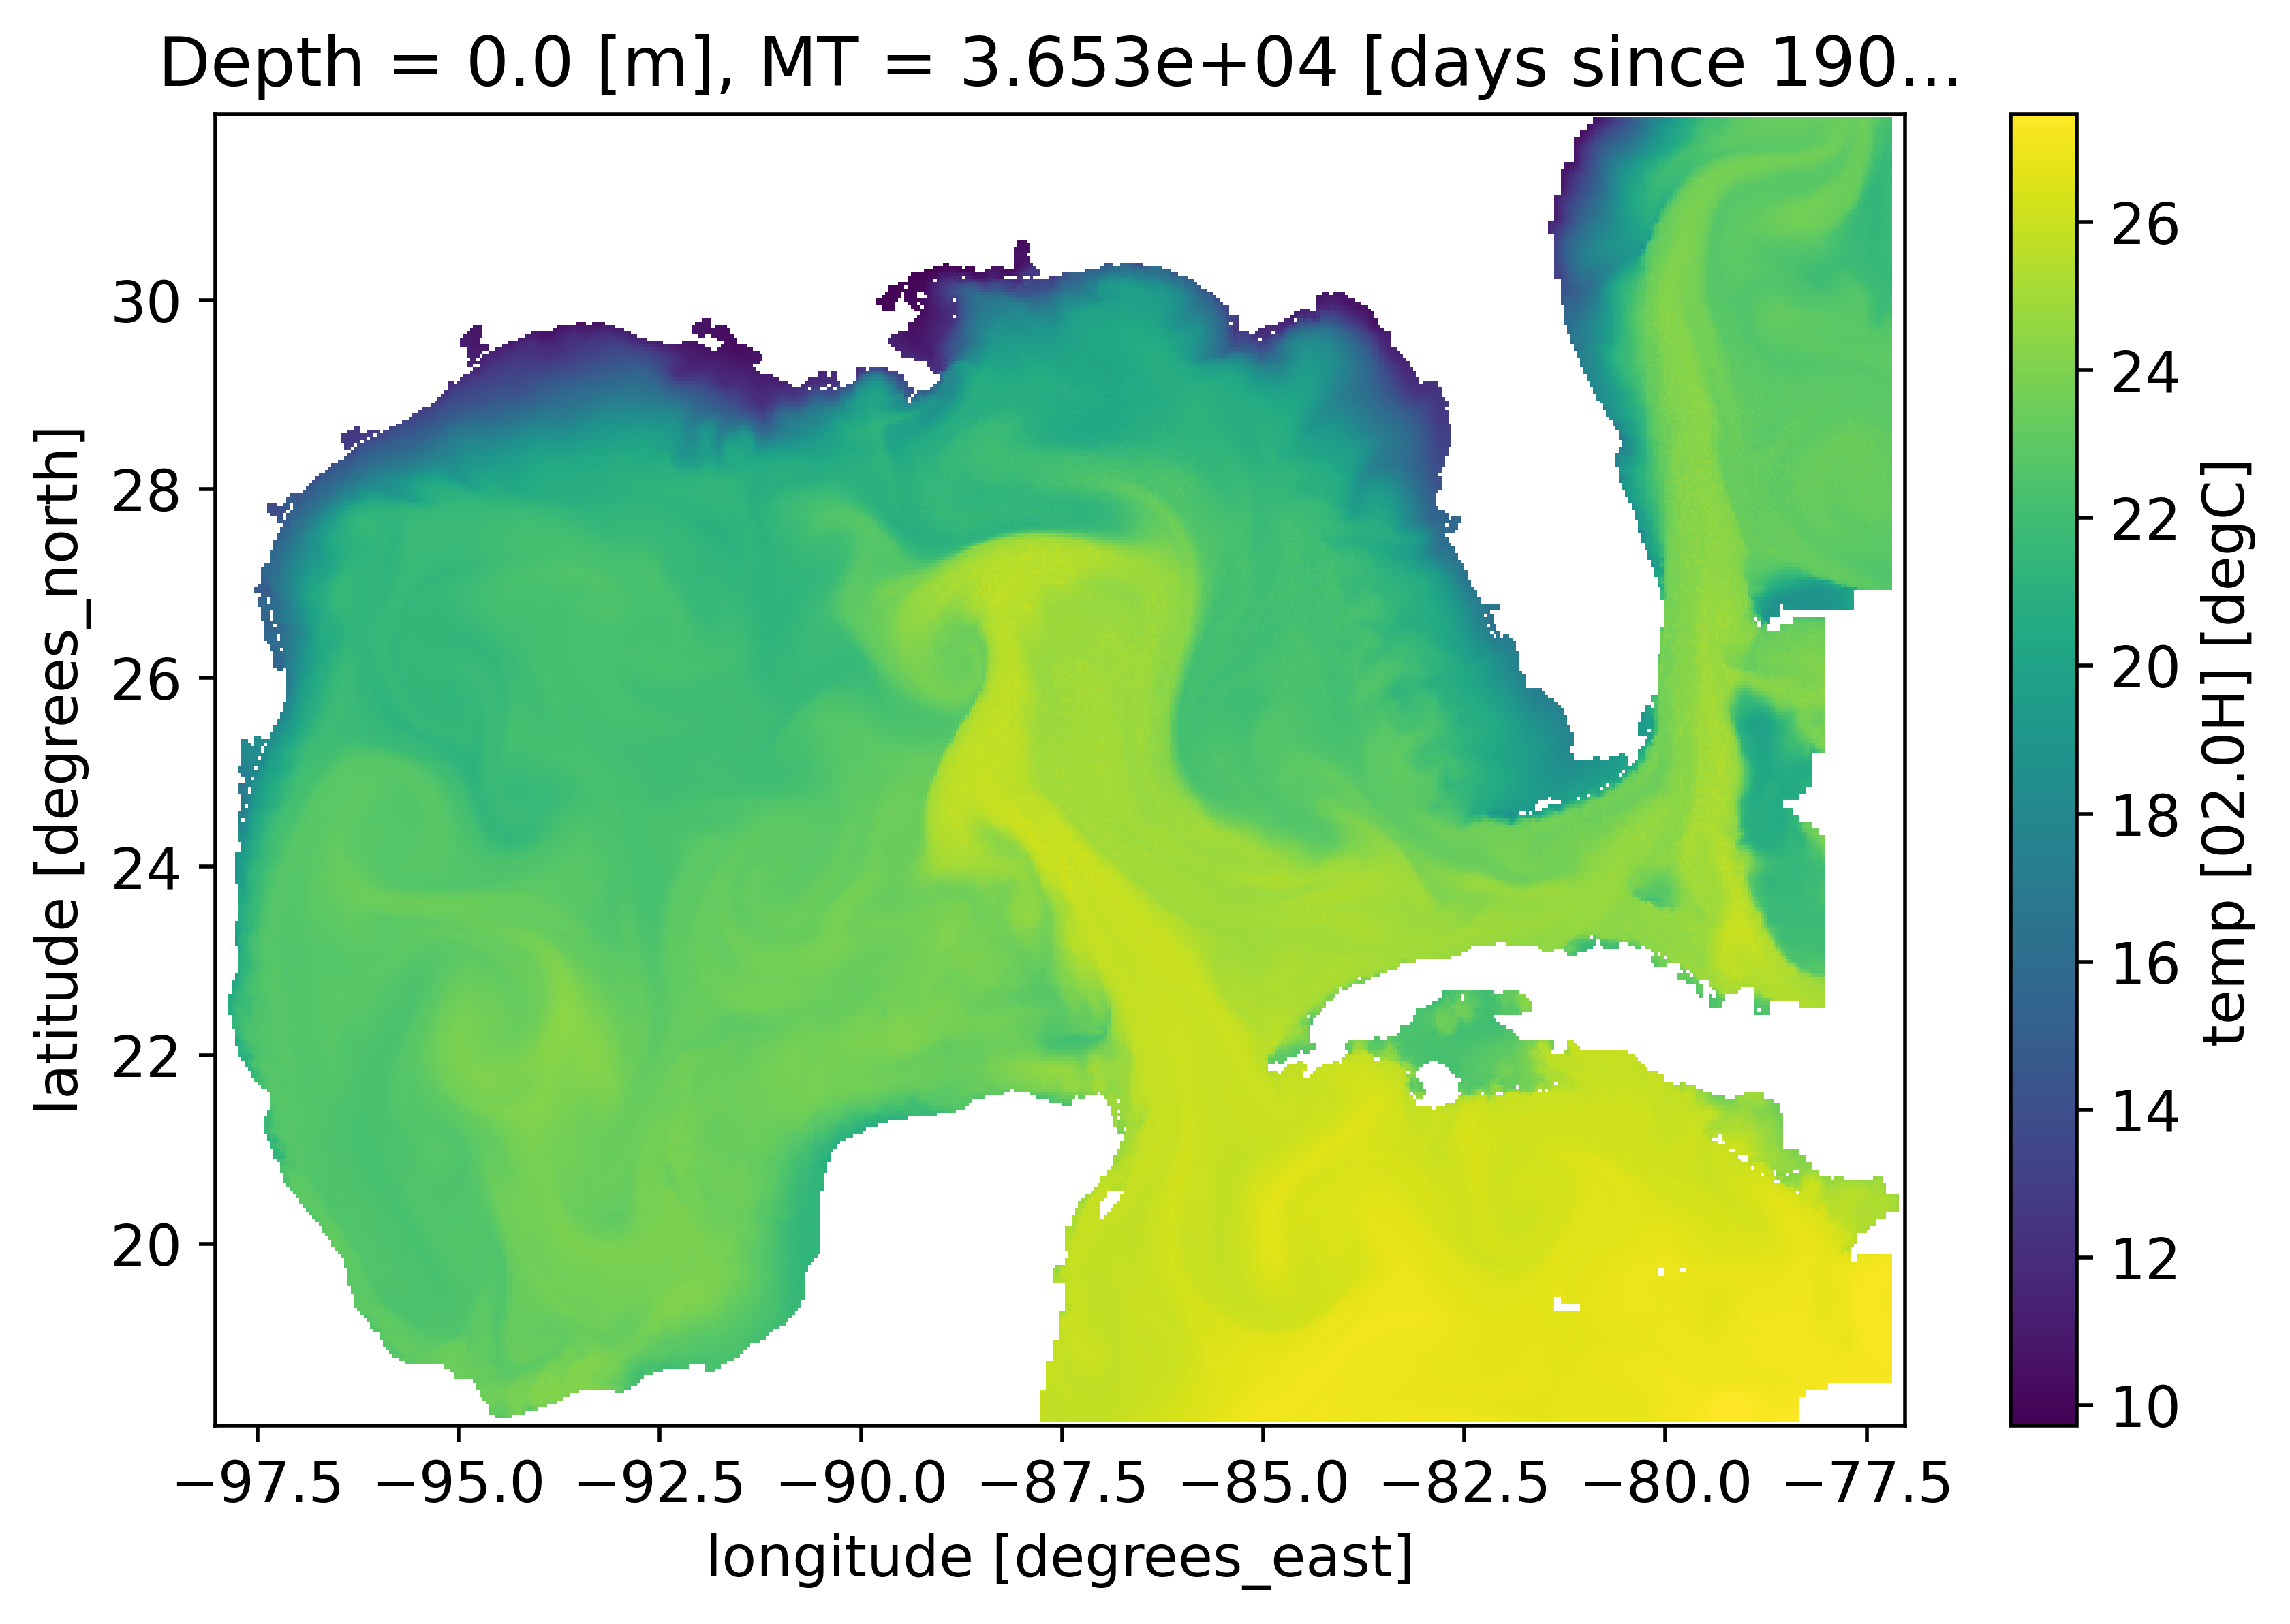

In [23]:
SST.plot()

I can also save this subset of the data to a new netcdf file locally very easily. See http://xarray.pydata.org/en/stable/io.html for more details.

In [24]:
SST.to_netcdf('SST_2001_001_01.nc') # the new netcdf file is saved in the local directory

And then I load in the new netcdf file in the same way as I did the remote data, but using the local filepath

In [25]:
sst_data = xr.open_dataset('SST_2001_001_01.nc', decode_times=False)

In [26]:
sst_data

<xarray.Dataset>
Dimensions:     (Longitude: 525, Latitude: 385)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude    (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth       float32 ...
    MT          float64 ...
    Date        float64 ...
Data variables:
    water_temp  (Latitude, Longitude) float32 ...

# Lab 6.1

**E.0** Finish Lab 5.2 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 1-2. Let me know if this feels like a good pace

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

See also http://xarray.pydata.org/en/stable/plotting.html for more info about plotting right from xarray (optional).

In [ ]:
###Modify aesthetics of a plot by using color, marker and linestyle
# example
import matplotlib.pyplot as plt

#create figure
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b', marker = 'o', linestyle = '--')  #see aesthetics for line here

#Add labels
# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")
plt.show()

In [ ]:
# Create small multiple plots by indicating number of rows and columns and by detailing by position the data included in each figure in the grid
# example

# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2,2,  sharey=True) #Define plot grid with row and columns
#sharey = True sets the y axis to be the same across all plots

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

In [ ]:
#plotting time series
#example
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index,climate_change["relative_temp"])  ##called from a csv file as pandas dataframe

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Relative temperature (Celsius)")

# Show the figure
plt.show()


#set ranges in pandas dataframes
# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

In [ ]:
#set two different y axis ranges in the same plot using ax.twinx

# Initalize a Figure and Axes
fig, ax= plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='r')

plt.show()

In [ ]:
# create a function to then apply to create plots
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color= color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

In [ ]:
##add an annotation
# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

 Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", 
             xy = (pd.Timestamp('2015-10-06'), 1), #what value to highlight
             xytext = (pd.Timestamp('2008-10-06'), -0.2), #the location of the text
             arrowprops = {'arrowstyle':'->', 'color': 'gray'}) #use an arrow to point at the value

plt.show()

**E.3** Using the lecture as a guide, save the sea surface temperature at ~100 m depth on your birthday in 2019 as a new, local netcdf file. You don't have to submit the file, just the code here.

In [29]:
# download 3D from the internet on 2019 day 198 (my birthday, I selected the 00 time)
link2 = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2019/031_archv.2019_198_00_3z.nc"
hycom_data_3DB = xr.open_dataset(link2, decode_times=False)

In [30]:
hycom_data_3DB

<xarray.Dataset>
Dimensions:     (Longitude: 525, Latitude: 385, Depth: 40, MT: 1)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude    (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Depth       (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * MT          (MT) float64 4.33e+04
    Date        (MT) float64 ...
Data variables:
    u           (MT, Depth, Latitude, Longitude) float32 ...
    v           (MT, Depth, Latitude, Longitude) float32 ...
    w_velocity  (MT, Depth, Latitude, Longitude) float32 ...
    water_temp  (MT, Depth, Latitude, Longitude) float32 ...
    salinity    (MT, Depth, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           HYCOM
    source:                          HYCOM archive
    experiment:                      02.0
    history:                         archv2ncdf3z
    DODS_EXTRA.Unlimited_Dimension:  MT

In [34]:
#filter for depth 100
SST2 = hycom_data_3DB.water_temp[0,19,:,:]  #19 is the index for the 100 m depth

In [35]:
#Save as a netcdf
SST2.to_netcdf('SST_2019_198_00.nc')

**E.4** Plot the above (your 2019 birthday SST) using the basic xarray funcitons

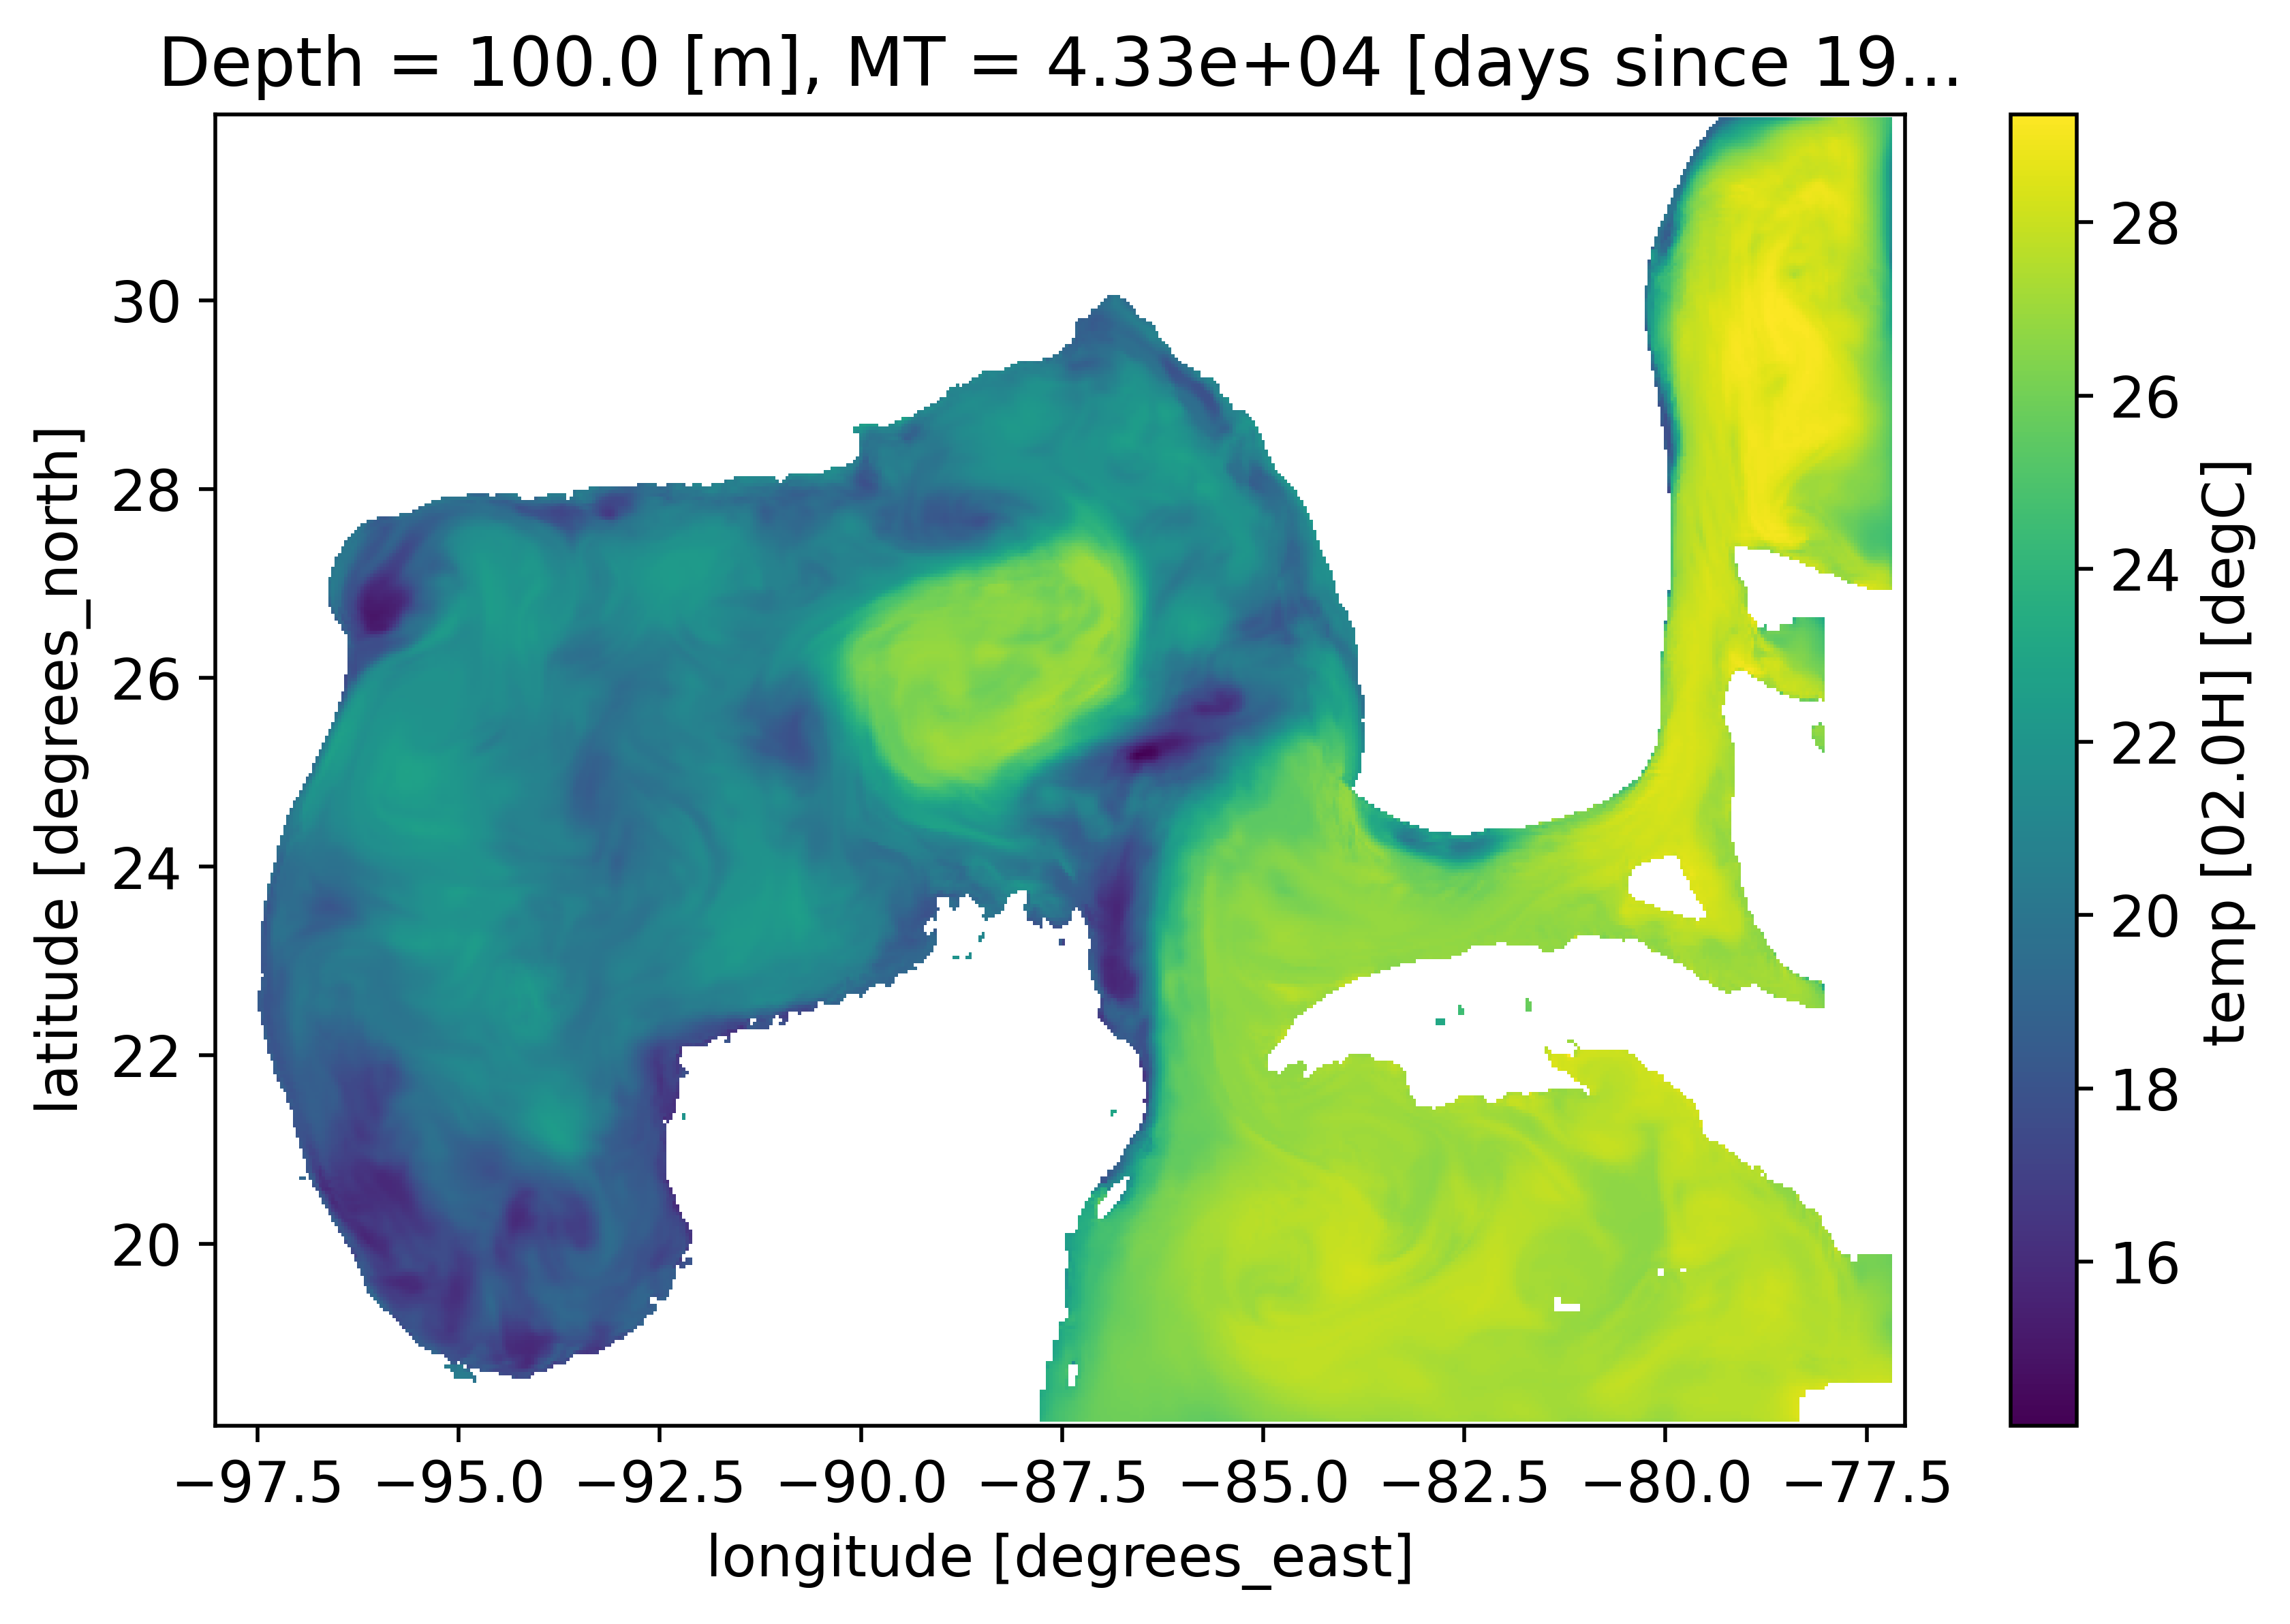

In [36]:
SST2.plot()

**E.5** What is the SST for flower garden banks national marine sanctuary o

In [50]:
#for surface level filter the data
SST3 = hycom_data_3DB.water_temp[0,0,:,:]  #using surface level depth

[]


In [71]:
#evaluate latitude
SST3['Latitude']

<xarray.DataArray 'Latitude' (Latitude: 385)>
array([18.091648, 18.129667, 18.167677, ..., 31.892748, 31.926704, 31.960648],
      dtype=float32)
Coordinates:
  * Latitude  (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth     float32 0.0
    MT        float64 4.33e+04
    Date      float64 ...
Attributes:
    standard_name:  latitude
    axis:           Y
    units:          degrees_north

In [82]:
#evaluate longitude
SST3['Longitude']

<xarray.DataArray 'Longitude' (Longitude: 525)>
array([-98.  , -97.96, -97.92, ..., -77.12, -77.08, -77.04], dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
    Depth      float32 0.0
    MT         float64 4.33e+04
    Date       float64 ...
Attributes:
    standard_name:  longitude
    axis:           X
    point_spacing:  even
    units:          degrees_east

In [81]:
# I took the lat and long of the flower garden banks from https://flowergarden.noaa.gov/visiting/buoyboundary.html
# Values to filter for
lat = 27.87
long = -93.6

# Filtering the array and extracting the index of the flower garden lat long
indiceslat = [index for index, value in enumerate(SST3['Latitude'].values) if value > 27.8 and value <27.9]
print(indiceslat)

indiceslong = [index for index, value in enumerate(SST3['Longitude'].values) if value > -93.7 and value < -93.5]
print(indiceslong)

[264, 265, 266]
[108, 109, 110, 111, 112]


In [84]:
#filter the aprox SST for flower garden banks
SST4 = hycom_data_3DB.water_temp[0,0,265,109]
SST4.values

array(29.40723, dtype=float32)

**Answer**: The SST for flower garden banks in my birthday in 2019 at surface level depth was 29.40.